In [1]:
#importing libraries
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path

In [2]:
x  = 'Dataset'
path = Path(x)
path.ls()

(#6) [Path('Dataset/buildings'),Path('Dataset/forest'),Path('Dataset/glacier'),Path('Dataset/mountain'),Path('Dataset/sea'),Path('Dataset/street')]

**Point to be Noted: Number of elements in a list of path is same as number of classes you have**

In [3]:
np.random.seed(40)
data = ImageDataLoaders.from_folder(path, train='train_folder', valid='valid_folder',
                                   valid_pct=0.2, item_tfms=Resize(224),
                                   batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)],
                                   num_workers=4)

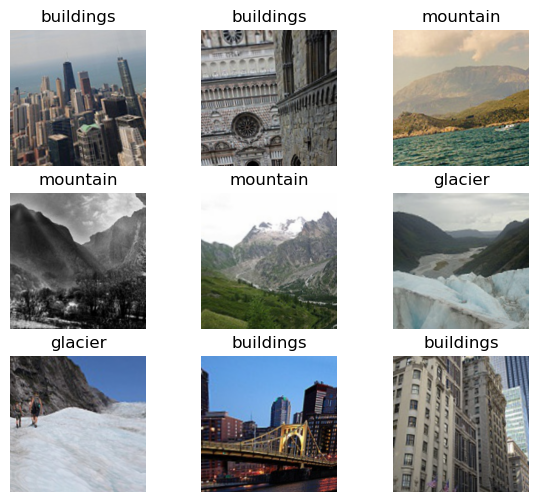

In [4]:
data.show_batch(figsize=(7,6))

In [5]:
data

In [6]:
print(data.categorize.vocab)
len(data.categorize.vocab)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


6

In [7]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path(''),path = Path("."))

C:\Users\asus\anaconda3\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


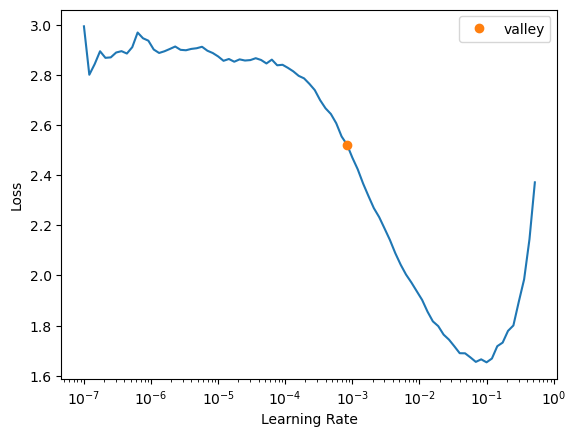

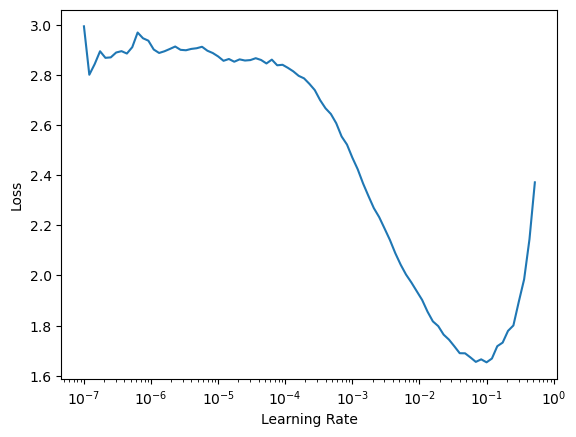

In [8]:
learn.lr_find()  # Find the learning rate
learn.recorder.plot_lr_find()

In [9]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(10,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.591488,0.456594,0.903421,23:33
1,0.802456,0.756756,0.891661,22:14
2,1.302718,1.003459,0.870278,22:10
3,0.945645,0.645888,0.897363,22:24
4,0.587211,0.550518,0.883464,22:19
5,0.518438,0.318011,0.911262,22:08
6,0.345559,1.304172,0.918746,22:33
7,0.252439,0.823740,0.931575,23:53
8,0.199736,1.003386,0.930862,53:09
9,0.200533,1.442325,0.931932,58:16


In [10]:
learn.unfreeze()
learn.fit_one_cycle(5,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.290449,21.651230,0.873842,1:37:02
1,0.254436,5.479868,0.928724,30:38
2,0.217939,0.628545,0.918033,29:07
3,0.165838,0.196826,0.934783,29:05
4,0.132795,0.177496,0.938346,29:06


In [2]:
# Access the training loss from the recorder
# learn.recorder.plot_losses()

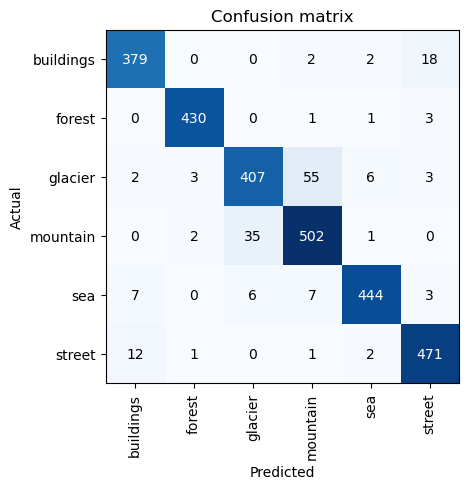

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [2]:
interp.plot_top_losses(6,figsize = (25,5))

NameError: name 'interp' is not defined

In [ ]:
# img = Image.open('/Test_img/glac.jpg')
# path = Path('Test_img')
#print(learn.predict('Test_img/20056.jpg'))
# target="/Test_img"
img=[]
for file in os.listdir('Test_img'):
    img.append('Test_img/'+file)
for i in img:
    print(learn.predict(i))


In [ ]:
img=[]
for file in os.listdir('Test_img'):
    img.append('Test_img/'+file)
for i in img:
    print(learn.predict(i))


In [ ]:
learn.export()
learn.model_dir = "/major"
learn.save("stage-1")

In [ ]:
Path('/major/stage-1.pth')